In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [2]:
from subprocess import check_output
print(check_output(["ls", "../../resources/prices"]).decode("utf8"))

coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_USDCoin.csv
coin_Uniswap.csv
coin_WrappedBitcoin.csv
coin_XRP.csv



## Load and inspect data

In [3]:
miota_df = pd.read_csv(Path('../../resources/prices/coin_Iota.csv'), index_col='SNo')
miota_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,IOTA,MIOTA,2017-06-14 23:59:59,0.606196,0.495745,0.592347,0.528916,1.419490e+07,1.470138e+09
2,IOTA,MIOTA,2017-06-15 23:59:59,0.543165,0.300365,0.528284,0.363661,1.030040e+07,1.010807e+09
3,IOTA,MIOTA,2017-06-16 23:59:59,0.448249,0.309852,0.353285,0.410757,6.920690e+06,1.141712e+09
4,IOTA,MIOTA,2017-06-17 23:59:59,0.444205,0.414139,0.426762,0.419906,3.100660e+06,1.167141e+09
5,IOTA,MIOTA,2017-06-18 23:59:59,0.426069,0.393790,0.420597,0.405862,2.514450e+06,1.128106e+09
...,...,...,...,...,...,...,...,...,...
1351,IOTA,MIOTA,2021-02-23 23:59:59,1.313691,0.893540,1.306506,1.088496,3.415576e+08,3.025509e+09
1352,IOTA,MIOTA,2021-02-24 23:59:59,1.310238,1.032310,1.090636,1.194751,2.794682e+08,3.320846e+09
1353,IOTA,MIOTA,2021-02-25 23:59:59,1.245290,1.091847,1.193894,1.091847,1.524689e+08,3.034822e+09


In [4]:
miota_df['Date'] = pd.to_datetime(miota_df['Date']).dt.date
miota_df['Date'] = pd.to_datetime(miota_df['Date'])
miota_df['Spread'] = miota_df.High - miota_df.Low
miota_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355 entries, 1 to 1355
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       1355 non-null   object        
 1   Symbol     1355 non-null   object        
 2   Date       1355 non-null   datetime64[ns]
 3   High       1355 non-null   float64       
 4   Low        1355 non-null   float64       
 5   Open       1355 non-null   float64       
 6   Close      1355 non-null   float64       
 7   Volume     1355 non-null   float64       
 8   Marketcap  1355 non-null   float64       
 9   Spread     1355 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 116.4+ KB


## Plot the closing value of MIOTA over time

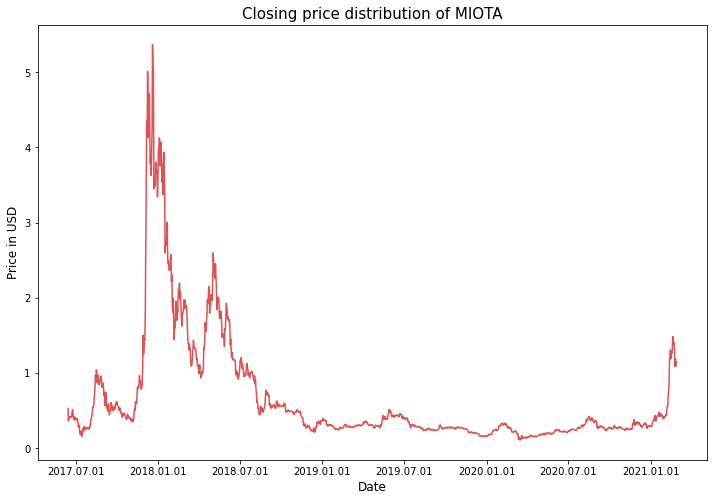

In [5]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = miota_df.Close.values, x=miota_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = miota_df.Close.values, x=miota_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of MIOTA", fontsize=15)
plt.show()

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

miota_df['Date_mpl'] = miota_df['Date'].apply(lambda x: mdates.date2num(x))

temp_miota_df = miota_df.copy(deep=False)
temp_miota_df = temp_miota_df.set_index(['Date'])
temp_miota_df = temp_miota_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_miota_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2017-06-14,0.606196,0.495745,0.592347,0.528916,1.419490e+07,17331.0
2017-06-15,0.543165,0.300365,0.528284,0.363661,1.030040e+07,17332.0
2017-06-16,0.448249,0.309852,0.353285,0.410757,6.920690e+06,17333.0
2017-06-17,0.444205,0.414139,0.426762,0.419906,3.100660e+06,17334.0
2017-06-18,0.426069,0.393790,0.420597,0.405862,2.514450e+06,17335.0
...,...,...,...,...,...,...
2021-02-23,1.313691,0.893540,1.306506,1.088496,3.415576e+08,18681.0
2021-02-24,1.310238,1.032310,1.090636,1.194751,2.794682e+08,18682.0
2021-02-25,1.245290,1.091847,1.193894,1.091847,1.524689e+08,18683.0


/Users/arttucker/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


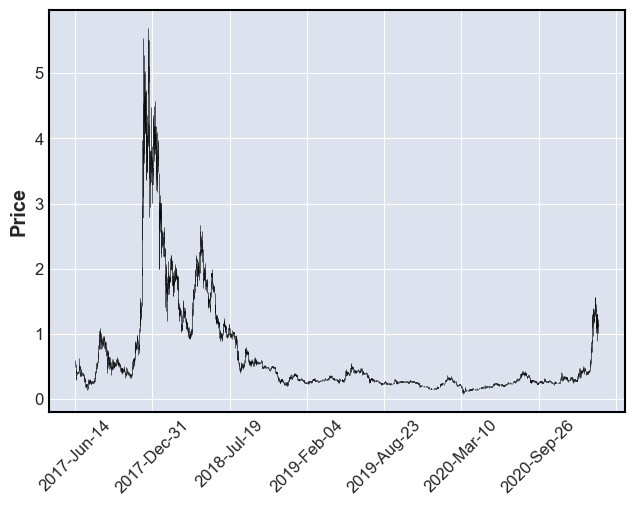

In [7]:
mpf.plot(temp_miota_df, type='candle')

## Price prediction

In [8]:
from fbprophet import Prophet

In [9]:
INPUT_FILE = "coin_Iota.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]

m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
1380,2021-03-25 23:59:59,0.216928,-0.272018,0.721646
1381,2021-03-26 23:59:59,0.219063,-0.283061,0.748533
1382,2021-03-27 23:59:59,0.230643,-0.321633,0.724886
1383,2021-03-28 23:59:59,0.231525,-0.313503,0.743634
1384,2021-03-29 23:59:59,0.244614,-0.256187,0.751703


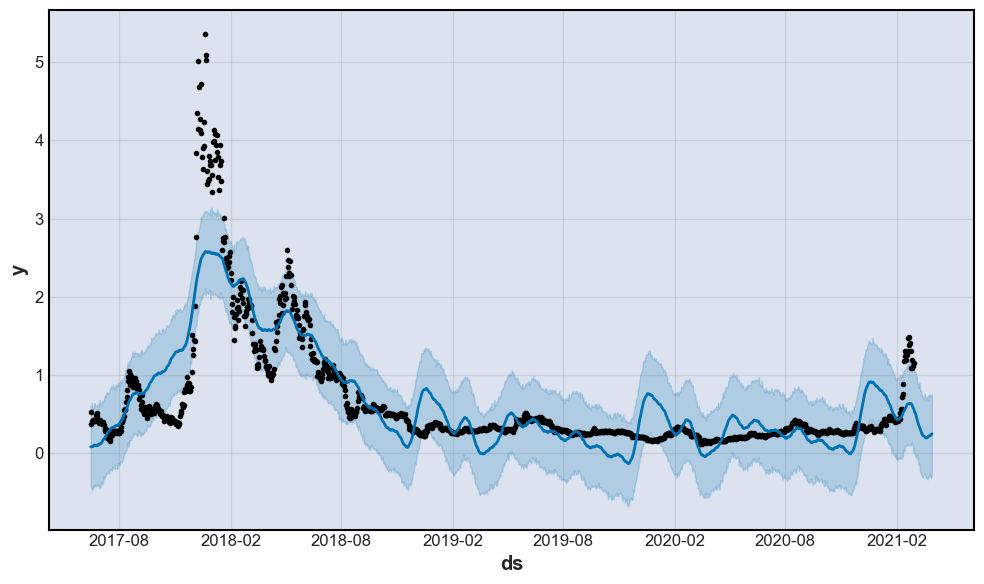

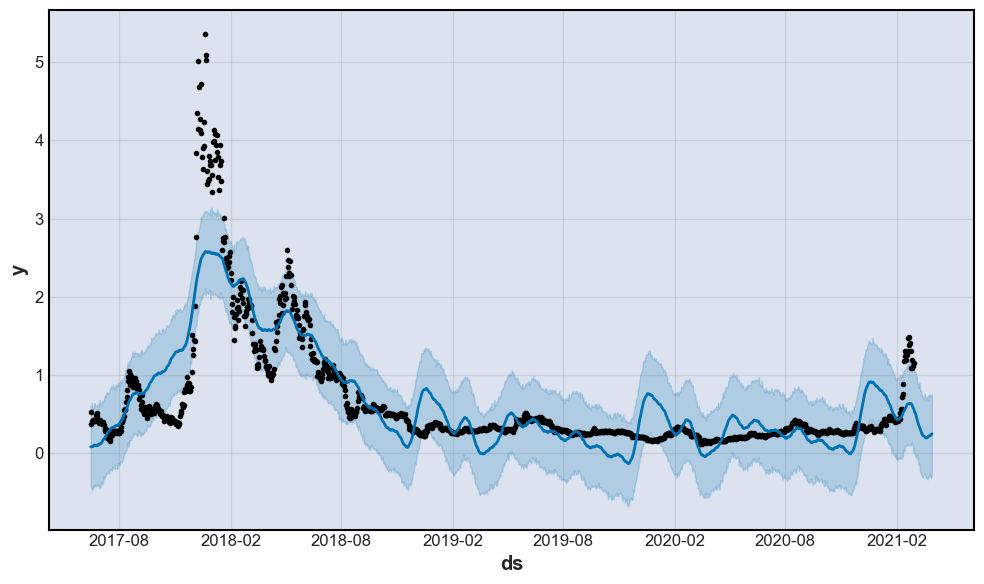

In [10]:
m.plot(forecast)

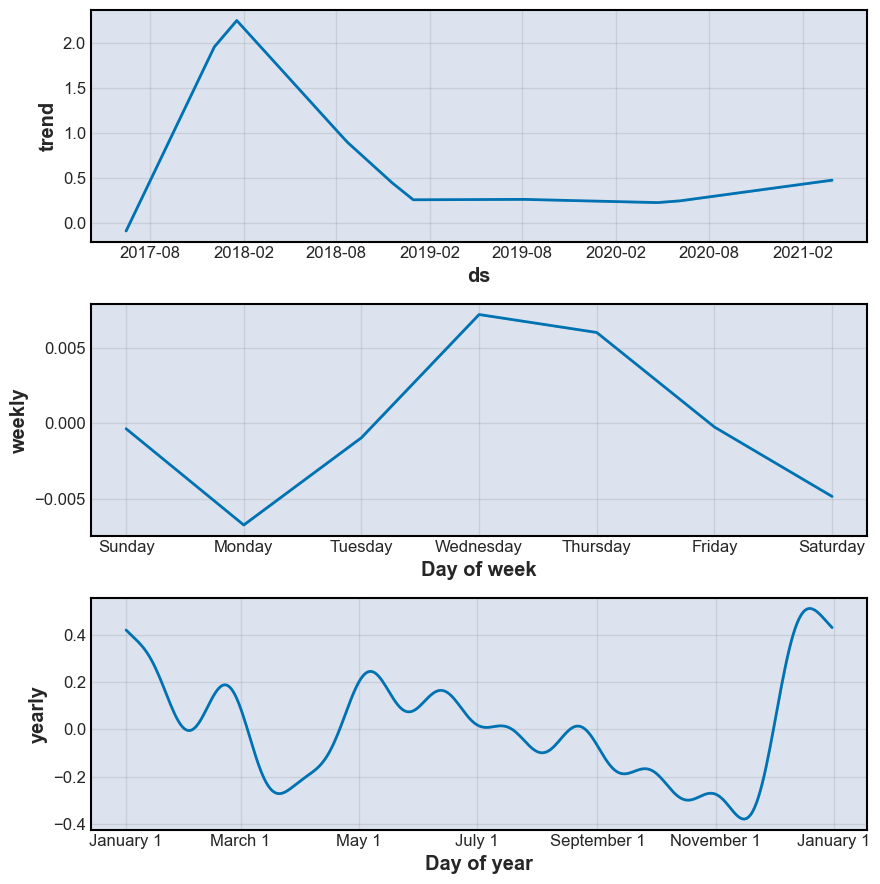

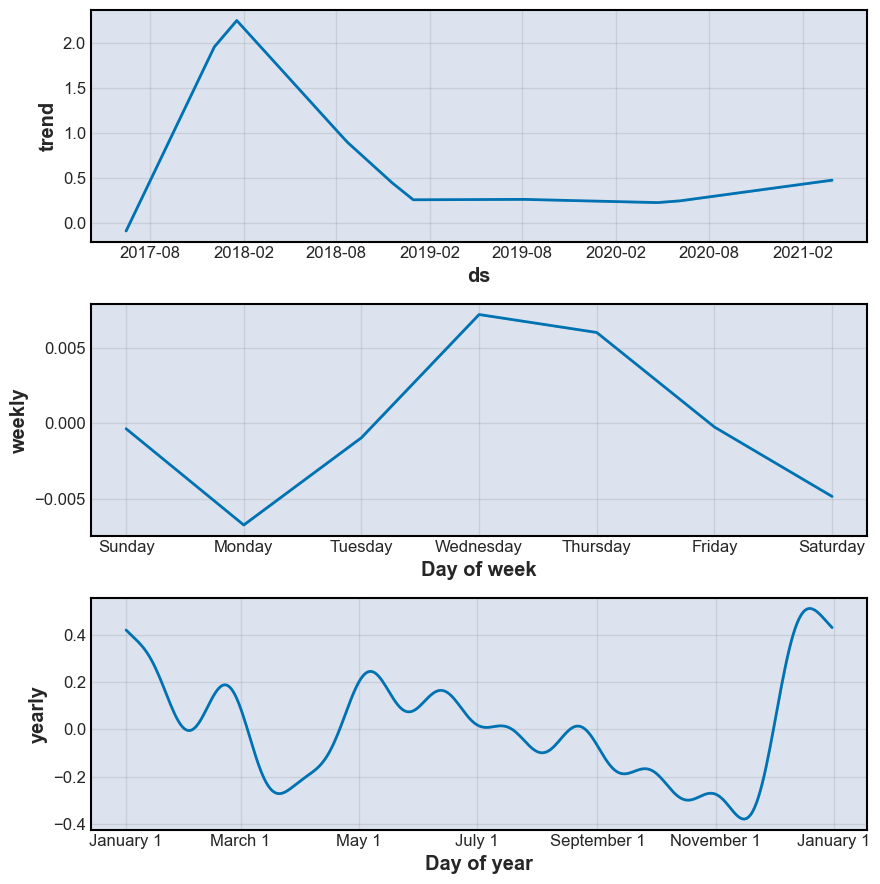

In [11]:
m.plot_components(forecast)